In [ ]:
import os
import pandas as pd

data_path = r"C:\Users\91973\Downloads\raw_data\raw_data\Arithmetic_Data\csv_converted"
sample_files = [f for f in os.listdir(data_path) if f.endswith(".csv")]

print(f"Found {len(sample_files)} CSV files.")

for file in sample_files:
    df = pd.read_csv(os.path.join(data_path, file))
    print(f"\n File: {file}")
    print(f"Shape: {df.shape}")
    print("Columns:", df.columns.tolist())
    print(df.head())
    break 


Found 60 CSV files.

📄 File: highlevel-1.csv
Shape: (29329, 26)
Columns: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']
   Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 16  \
0         Na

In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

txt_folder = r"C:\Users\91973\Downloads\raw_data\raw_data\Stroop_Data"
csv_folder = "Stroop_CSV"
os.makedirs(csv_folder, exist_ok=True)

for file in os.listdir(txt_folder):
    if file.endswith(".txt"):
        file_path = os.path.join(txt_folder, file)
        try:
            df = pd.read_csv(file_path, sep="\t", header=None, engine="python")
            df = df.dropna(axis=1, how='all')
            if df.empty:
                print(f" Skipped {file}: Empty or invalid format")
                continue
            csv_path = os.path.join(csv_folder, file.replace(".txt", ".csv"))
            df.to_csv(csv_path, index=False)
            print(f" Converted: {file}")
        except Exception as e:
            print(f" Failed to convert {file}: {e}")

def extract_features(df):
    features = []
    if df.shape[1] < 8:  
        return None
    for col in df.columns[:8]:  
        signal = df[col].dropna().astype(float).values
        if len(signal) == 0:
            return None
        features.append(np.mean(signal))
        features.append(np.std(signal))
        features.append(np.min(signal))
        features.append(np.max(signal))
    return features

def get_label_from_filename(filename):
    if "natural" in filename:
        return 0
    elif "lowlevel" in filename:
        return 1
    elif "midlevel" in filename:
        return 2
    elif "highlevel" in filename:
        return 3
    else:
        return None

X = []
y = []

for file in os.listdir(csv_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(csv_folder, file)
        try:
            df = pd.read_csv(file_path)
            if df.empty:
                print(f" Skipped {file}: Empty data")
                continue
            features = extract_features(df)
            label = get_label_from_filename(file)
            if features is not None and label is not None:
                X.append(features)
                y.append(label)
            else:
                print(f" Skipped {file}: Invalid features or label")
        except Exception as e:
            print(f" Skipped {file} due to error: {e}")

X = np.array(X)
y = np.array(y)

if len(X) == 0:
    raise ValueError("No usable EEG recordings found.")

print(f" Final dataset: {X.shape[0]} samples, {X.shape[1]} features")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Natural", "Low", "Mid", "High"]))

✅ Converted: highlevel-1.txt
✅ Converted: highlevel-10.txt
✅ Converted: highlevel-11.txt
✅ Converted: highlevel-12.txt
✅ Converted: highlevel-13.txt
✅ Converted: highlevel-14.txt
✅ Converted: highlevel-15.txt
✅ Converted: highlevel-2.txt
✅ Converted: highlevel-3.txt
✅ Converted: highlevel-4.txt
✅ Converted: highlevel-5.txt
✅ Converted: highlevel-6.txt
✅ Converted: highlevel-7.txt
✅ Converted: highlevel-8.txt
✅ Converted: highlevel-9.txt
✅ Converted: lowlevel-1.txt
✅ Converted: lowlevel-10.txt
✅ Converted: lowlevel-11.txt
✅ Converted: lowlevel-12.txt
✅ Converted: lowlevel-13.txt
✅ Converted: lowlevel-14.txt
✅ Converted: lowlevel-15.txt
✅ Converted: lowlevel-2.txt
✅ Converted: lowlevel-3.txt
✅ Converted: lowlevel-4.txt
✅ Converted: lowlevel-5.txt
✅ Converted: lowlevel-6.txt
✅ Converted: lowlevel-7.txt
✅ Converted: lowlevel-8.txt
✅ Converted: lowlevel-9.txt
✅ Converted: midlevel-1.txt
✅ Converted: midlevel-10.txt
✅ Converted: midlevel-11.txt
✅ Converted: midlevel-12.txt
✅ Converted: midle

ValueError: No usable EEG recordings found.

In [ ]:
import pandas as pd

df = pd.read_csv("Stroop_CSV/highlevel-1.csv") 
print(df.head(10))
print("\nShape:", df.shape)
print("\nColumns:", df.columns)

                                                   0
0  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
1  1.0, 31109.96259569676, 29969.420131375806, 31...
2  2.0, 31111.795438742098, 29966.51440459662, 31...
3  3.0, 31111.996604442193, 29965.26270690712, 31...
4  4.0, 31112.10836316447, 29966.626163318895, 31...
5  5.0, 31111.01312768616, 29967.810805775025, 31...
6  6.0, 31114.164723654358, 29970.135387198377, 3...
7  7.0, 31115.170552154847, 29967.073198208, 3134...
8  8.0, 31113.96355795426, 29965.329762140485, 31...
9  9.0, 31111.81779048655, 29968.526061597597, 31...

Shape: (28168, 1)

Columns: Index(['0'], dtype='object')


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

csv_folder = "stroop_csv"
X = []
y = []

def get_label_from_filename(filename):
    if "highlevel" in filename:
        return "high"
    elif "midlevel" in filename:
        return "mid"
    elif "lowlevel" in filename:
        return "low"
    elif "natural" in filename:
        return "natural"
    else:
        return None

for file in os.listdir(csv_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(csv_folder, file)
        label = get_label_from_filename(file)

        if label is None:
            print(f" Skipped {file}: Unknown label")
            continue

        try:
            raw = pd.read_csv(file_path, header=None)

            data = raw[0].astype(str).str.split(',', expand=True)
            data = data.apply(pd.to_numeric, errors='coerce').dropna()

            if data.shape[1] < 10:
                print(f" Skipped {file}: Too few usable features ({data.shape[1]})")
                continue

            X.append(data.values)
            y.extend([label] * len(data))

        except Exception as e:
            print(f" Error reading {file}: {e}")

if len(X) == 0:
    raise ValueError(" No usable EEG recordings found.")

X = np.vstack(X)
y = np.array(y)

print(f"\n Final dataset loaded: {X.shape[0]} samples, {X.shape[1]} features")



✅ Final dataset loaded: 0 samples, 25 features


In [ ]:
import os
import pandas as pd

file_path = os.path.join("stroop_csv", "highlevel-1.csv")
df = pd.read_csv(file_path, header=None)

print(" Raw preview:")
print(df.head(10))


🔍 Raw preview:
                                                   0
0                                                  0
1  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...
2  1.0, 31109.96259569676, 29969.420131375806, 31...
3  2.0, 31111.795438742098, 29966.51440459662, 31...
4  3.0, 31111.996604442193, 29965.26270690712, 31...
5  4.0, 31112.10836316447, 29966.626163318895, 31...
6  5.0, 31111.01312768616, 29967.810805775025, 31...
7  6.0, 31114.164723654358, 29970.135387198377, 3...
8  7.0, 31115.170552154847, 29967.073198208, 3134...
9  8.0, 31113.96355795426, 29965.329762140485, 31...


In [29]:
with open("stroop_csv/natural-1.csv", "r") as f:
    for _ in range(3):
        print(f.readline())


0

"0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, -0.004, 0.972, 192.0, 1.0, 16.0, 255.0, 224.0, 30.0, 96.0, 0.0, 0.0, 0.0, 1.6566615167101493E9, 0.0, 2022-07-01 15:45:16.710"

"1.0, 35073.86566088982, 33860.3447509223, 36970.99232327847, 23014.093698751178, 23098.538589303327, 112793.78685877167, 32417.98668122133, 28255.041331653756, 0.034, -0.004, 0.972, 192.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6566615169108136E9, 0.0, 2022-07-01 15:45:16.910"



In [ ]:
import pandas as pd
import os

def read_valid_csv_files(folder_path):
    all_data = []
    failed_files = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            try:
                raw = pd.read_csv(file_path, header=None, skiprows=1)
                data = raw[0].apply(lambda x: [float(i.strip()) if 'E' in i or i.replace('.', '', 1).isdigit() else i.strip() for i in x.replace('"', '').split(',')])
                df = pd.DataFrame(data.tolist())
                if df.shape[1] == 25:
                    all_data.append(df)
                else:
                    print(f" Skipping {filename}: {df.shape[1]} columns")
            except Exception as e:
                print(f" Error reading {filename}: {e}")
                failed_files.append(filename)

    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        print(f"\n Final dataset loaded: {combined_df.shape[0]} samples, {combined_df.shape[1]} features")
        return combined_df
    else:
        print(" No valid data found.")
        return None
        
folder_path = "stroop_csv"
final_data = read_valid_csv_files(folder_path)



✅ Final dataset loaded: 1304765 samples, 25 features


In [ ]:
df.head()
df.dtypes


0    object
dtype: object

In [ ]:
df = df[0].str.replace('"', '').str.strip().str.split(',', expand=True)

for col in df.columns[:-1]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[df.columns[-1]] = pd.to_datetime(df[df.columns[-1]], errors='coerce')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,...,255.0,160.0,30.0,144.0,0.0,0.0,0.0,1.656663e+09,0.0,2022-07-01 16:12:57.879
2,1.0,31109.962596,29969.420131,31340.543191,21502.400518,21558.324582,160264.153512,29772.210690,23538.376217,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.656663e+09,0.0,2022-07-01 16:12:58.000
3,2.0,31111.795439,29966.514405,31338.062148,21502.020538,21558.548100,160263.840588,29769.595536,23537.660961,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.656663e+09,0.0,2022-07-01 16:12:58.001
4,3.0,31111.996604,29965.262707,31339.135032,21503.294588,21560.246832,160265.718134,29766.153367,23539.314990,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.656663e+09,0.0,2022-07-01 16:12:58.001


In [37]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,...,255.0,160.0,30.0,144.0,0.0,0.0,0.0,1.656663e+09,0.0,2022-07-01 16:12:57.879
2,1.0,31109.962596,29969.420131,31340.543191,21502.400518,21558.324582,160264.153512,29772.210690,23538.376217,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.656663e+09,0.0,2022-07-01 16:12:58.000
3,2.0,31111.795439,29966.514405,31338.062148,21502.020538,21558.548100,160263.840588,29769.595536,23537.660961,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.656663e+09,0.0,2022-07-01 16:12:58.001
4,3.0,31111.996604,29965.262707,31339.135032,21503.294588,21560.246832,160265.718134,29766.153367,23539.314990,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.656663e+09,0.0,2022-07-01 16:12:58.001


In [39]:
df.columns = [
    "sample_index", "EEG1", "EEG2", "EEG3", "EEG4", "EEG5", "EEG6", "EEG7", "EEG8",
    "accel_x", "accel_y", "accel_z",
    "misc1", "misc2", "misc3", "misc4", "misc5", "misc6", "misc7", "misc8",
    "misc9", "misc10",
    "timestamp", "event", "datetime"
]

df.head()


,sample_index,EEG1,EEG2,EEG3,EEG4,EEG5,EEG6,EEG7,EEG8,accel_x,...,misc4,misc5,misc6,misc7,misc8,misc9,misc10,timestamp,event,datetime
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,...,255.0,160.0,30.0,144.0,0.0,0.0,0.0,1.656663e+09,0.0,2022-07-01 16:12:57.879
2,1.0,31109.962596,29969.420131,31340.543191,21502.400518,21558.324582,160264.153512,29772.210690,23538.376217,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.656663e+09,0.0,2022-07-01 16:12:58.000
3,2.0,31111.795439,29966.514405,31338.062148,21502.020538,21558.548100,160263.840588,29769.595536,23537.660961,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.656663e+09,0.0,2022-07-01 16:12:58.001
4,3.0,31111.996604,29965.262707,31339.135032,21503.294588,21560.246832,160265.718134,29766.153367,23539.314990,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.656663e+09,0.0,2022-07-01 16:12:58.001


In [ ]:
df["dt"] = df["datetime"].diff().dt.total_seconds()

df["dt"].value_counts().head(10)


dt
0.000    27581
0.001      292
0.479       82
0.480       59
0.478       33
0.481       14
0.477        7
0.469        4
0.482        3
0.099        2
Name: count, dtype: int64

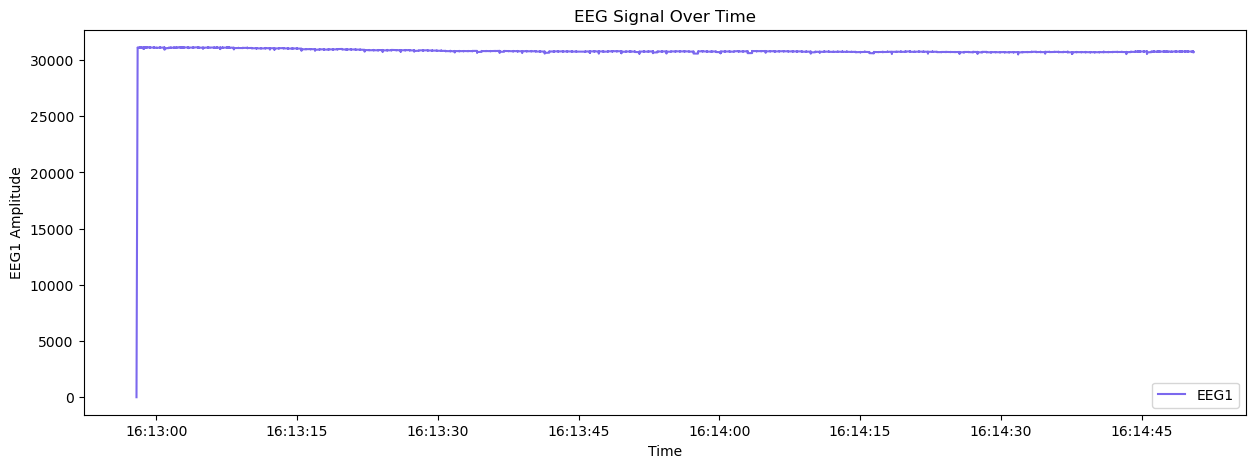

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(df["datetime"], df["EEG1"], label="EEG1", color='mediumslateblue')
plt.xlabel("Time")
plt.ylabel("EEG1 Amplitude")
plt.title("EEG Signal Over Time")
plt.legend()
plt.show()


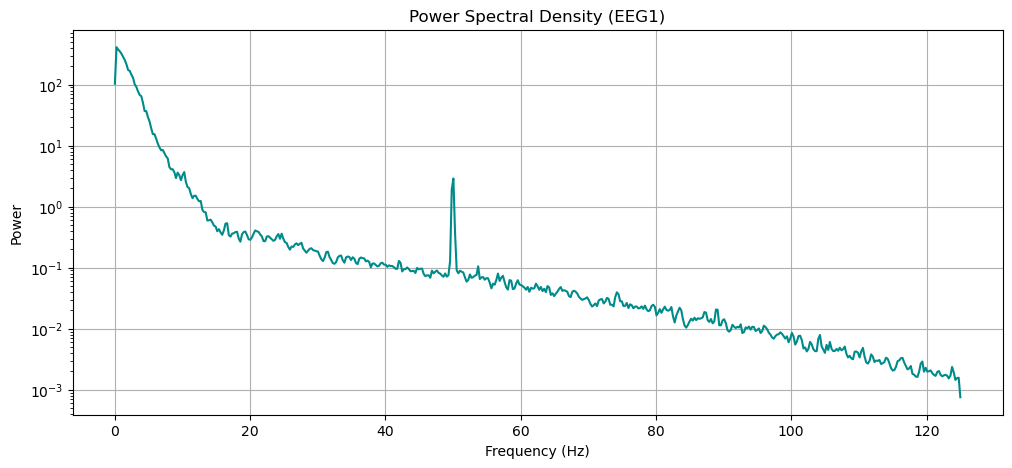

In [ ]:
from scipy.signal import welch
import numpy as np

eeg_signal = df["EEG1"].dropna()
fs = 250

freqs, psd = welch(eeg_signal, fs, nperseg=1024)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.semilogy(freqs, psd, color="darkcyan")
plt.title("Power Spectral Density (EEG1)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.grid()
plt.show()


In [ ]:
def bandpower(data, fs, band, window_sec=4):
    from scipy.signal import welch
    band = np.array(band)
    low, high = band

    freqs, psd = welch(data, fs, nperseg=fs*window_sec)
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    return np.mean(psd[idx_band])

bands = {
    "delta": (0.5, 4),
    "theta": (4, 8),
    "alpha": (8, 12),
    "beta": (12, 30),
    "gamma": (30, 100)
}

segment = df["EEG1"].dropna().values[:10 * fs]

features = {band: bandpower(segment, fs, band_range) for band, band_range in bands.items()}
print(features)


{'delta': 81.18865172428393, 'theta': 13.46631433655476, 'alpha': 3.441347068683998, 'beta': 0.37262454506967757, 'gamma': 0.058110925158366036}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = []
y = []

for i in range(30):

    seg = df["EEG1"].dropna().values[i*fs*5:(i+1)*fs*5]
    if len(seg) == 0: continue
    powers = [bandpower(seg, fs, b) for b in bands.values()]
    X.append(powers)
    y.append(0)  

for i in range(30, 60):
    
    seg = df["EEG1"].dropna().values[i*fs*5:(i+1)*fs*5]
    if len(seg) == 0: continue
    powers = [bandpower(seg, fs, b) for b in bands.values()]
    X.append(powers)
    y.append(1)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



C:\Users\91973\anaconda3\Lib\site-packages\scipy\signal\_spectral_py.py:600: UserWarning: nperseg = 1000 is greater than input length  = 668, using nperseg = 668
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


In [ ]:
import time

for i in range(0, len(df), fs * 5):  
    chunk = df["EEG1"].dropna().values[i:i+fs*5]
    if len(chunk) < fs * 5:
        continue
    powers = [bandpower(chunk, fs, b) for b in bands.values()]
    pred = clf.predict([powers])
    print("Cognitive State:", "Relaxed" if pred[0] == 0 else "Focused")
    time.sleep(1)  


Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed
Cognitive State: Relaxed


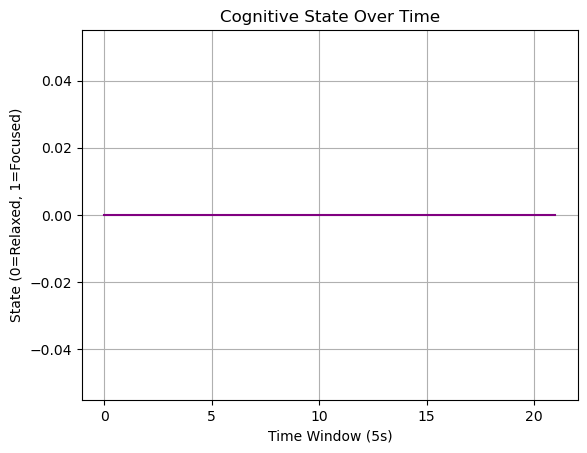

In [52]:
state_predictions = []
for i in range(0, len(df["EEG1"].dropna()), fs * 5):
    chunk = df["EEG1"].dropna().values[i:i+fs*5]
    if len(chunk) < fs * 5: break
    powers = [bandpower(chunk, fs, b) for b in bands.values()]
    state = clf.predict([powers])[0]
    state_predictions.append(state)

plt.plot(state_predictions, color='purple')
plt.title("Cognitive State Over Time")
plt.xlabel("Time Window (5s)")
plt.ylabel("State (0=Relaxed, 1=Focused)")
plt.grid()
plt.show()
